> **Name:** Shashaank Singh <br>
> **Registration Number:** 220968310 <br>
> **Roll Number:** 47 <br>
> **Batch:** A2 <br>
> **Week:** 8

### Required Imports

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

from gymnasium.envs.toy_text.frozen_lake import generate_random_map

_Creating a function to obtain policy from a given values table:_

In [2]:
def determine_policy (
    environment: gym.envs.toy_text.FrozenLakeEnv,
    values: np.ndarray,
    discount_factor: float = .9
) -> np.ndarray:
    policy: np.ndarray = np.zeros((environment.observation_space.n, environment.action_space.n))
    action_values: np.ndarray = np.zeros(environment.action_space.n)
    
    for i in range(environment.observation_space.n): # For each state
        action_values.fill(0)
        for j in range(environment.action_space.n): # For each action
            for prob_next, next_state, reward, _ in environment.P[i][j]: # For each possible next state
                action_values[j] += prob_next * (reward + discount_factor * values[next_state])
        max_val_actions: np.ndarray = np.argwhere(action_values == action_values.max()).flatten()
        policy[i][max_val_actions] = 1. / len(max_val_actions)
        
    return policy

**a.** Create a Policy Iteration function with the following parameters:
- `policy`: 2D array of a size n(S) x n(A), each cell represents a probability of taking action `a` in state `s`.
- `environment`: Initialized OpenAI gym environment object
- `discount_factor`: MDP discount factor
- `theta`: A threshold of a value function. Change once the update to value function is below this number.
- `max_iterations`: Maximum number of iterations

In [3]:
def policy_iter (
    policy: np.ndarray,
    environment: gym.envs.toy_text.FrozenLakeEnv,
    discount_factor: float = 0.9,
    theta: float = 1e-10,
    max_iterations: int = -1
) -> np.ndarray:
    assert isinstance(environment, gym.envs.toy_text.FrozenLakeEnv), \
        "The environment must be an instance of `gym.envs.toy_text.FrozenLakeEnv`. " \
        "Try passing `env.unwrapped` and see if it helps."
    values: np.ndarray = np.zeros(environment.observation_space.n)

    while max_iterations: # Such a disappointing do-while workaround
        max_iterations -= 1
        old_values: np.ndarray = values.copy()
        for i in range(environment.observation_space.n): # For each state
            val: float = 0.
            for j in range(environment.action_space.n): # For each action suggested by policy
                # Find next state and reward from env.P
                for prob_next, next_state, reward, _ in environment.P[i][j]: # For each possible next state
                    # Vₜ(s) = Σπ(a|s)Σp(s',r|s,a)[r + γ * Vₜ₋₁(s')]
                    val += prob_next * (reward + discount_factor * old_values[next_state]) \
                        * policy[i][j] # Multiplying the Σπ(a) part
            values[i] = val 

        # Check if total absolute error falls in threshold
        if np.fabs(old_values - values).sum() < theta:
            break
    
    return values

**b.** Create a Value Iteration function with the following parameters:
- `environment`: Initialized OpenAI gym environment object
- `discount_factor`: MDP discount factor
- `theta`: A threshold of a value function. Change once the update to value function is below this number.
- `max_iterations`: Maximum number of iterations

In [4]:
def value_iter (
    environment: gym.envs.toy_text.FrozenLakeEnv,
    discount_factor: float = 0.9,
    theta: float = 1e-10,
    max_iterations: int = -1
) -> np.ndarray:
    assert isinstance(environment, gym.envs.toy_text.FrozenLakeEnv), \
        "The environment must be an instance of `gym.envs.toy_text.FrozenLakeEnv`. " \
        "Try passing `env.unwrapped` and see if it helps."
    values: np.ndarray = np.zeros(environment.observation_space.n)

    while max_iterations: # Such a disappointing do-while workaround
        max_iterations -= 1
        old_values: np.ndarray = values.copy()
        for i in range(environment.observation_space.n): # For each state
            values[i] = float("-inf")
            for j in range(environment.action_space.n): # For each action suggested by policy
                val: float = 0.
                # Find next state and reward from env.P
                for prob_next, next_state, reward, _ in environment.P[i][j]: # For each possible next state
                    # Vₜ(s) = max Σp(s',r|s,a)[r + γ * Vₜ₋₁(s')]
                    val += prob_next * (reward + discount_factor * old_values[next_state])
                values[i] = max(values[i], val)

        # Check if total absolute error falls in threshold
        if np.fabs(old_values - values).sum() < theta:
            break
    
    return values

**c.** Compare the number of wins, and average return after 1000 episodes and comment on which method performed better.

_Fixing constants:_

In [6]:
num_episodes: int = 10 # Number of episodes that will run

_Creating the environment:_

In [23]:
env: gym.Env = gym.make(
    "FrozenLake-v1",
    desc=generate_random_map(),
    #is_slippery=False,
    render_mode="human"
)
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>

_Reset to initial state:_

In [24]:
env.reset()

(0, {'prob': 1})

_Render environment: (run in `rgb_array` render mode)_

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


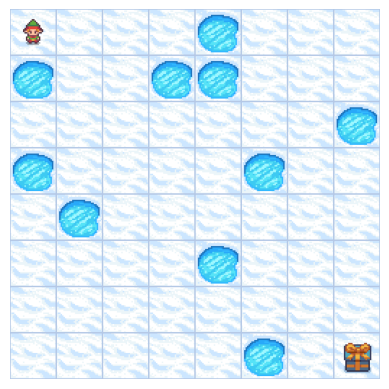

In [8]:
plt.axis("off") # Hide axes
plt.imshow(env.render())

_Create initial policy:_

In [25]:
policy1: np.ndarray = np.full((env.observation_space.n, env.action_space.n), 1. / env.action_space.n)
policy1

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.

_Determine optimal policy by policy iteration:_

In [26]:
while True:
    values: np.ndarray = policy_iter(policy1, env.unwrapped) # Run policy evaluation
    old_policy: np.ndarray = policy1
    policy1 = determine_policy(env.unwrapped, values)

    if (policy1 == old_policy).all():
        break
policy1

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        ,

_Determine optimal policy by value iteration:_

In [27]:
values = value_iter(env.unwrapped)
policy2: np.ndarray = determine_policy(env.unwrapped, values)
policy2

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        ,

_Determine rewards for policy iteration:_

In [28]:
episodic_rewards1: list[float] = []

for episode in range(num_episodes):
    obs, _ = env.reset()
    terminated: bool = False
    truncated: bool = False
    total_reward: float = 0.

    while not terminated and not truncated:
        # Select optimal action
        action: int = np.random.choice( # Select one of them at random
            np.argwhere( # Find all such actions
                policy1[obs] == policy1[obs].max() # For largest policy prob
            ).flatten()
        )
        print(f"[Episode {episode+1}] State: {obs}, Action selected: {action}")
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward

    episodic_rewards1.append(total_reward)
    print(f"[Episode {episode+1}] Terminated, total reward: {total_reward}")

episodic_rewards1

[Episode 1] State: 0, Action selected: 1
[Episode 1] State: 1, Action selected: 2
[Episode 1] State: 2, Action selected: 3
[Episode 1] State: 3, Action selected: 2
[Episode 1] State: 4, Action selected: 2
[Episode 1] State: 5, Action selected: 2
[Episode 1] State: 5, Action selected: 2
[Episode 1] State: 6, Action selected: 2
[Episode 1] State: 7, Action selected: 2
[Episode 1] State: 7, Action selected: 2
[Episode 1] State: 15, Action selected: 2
[Episode 1] State: 23, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 31, Action selected: 2
[Episode 1] State: 39, Action selected: 2
[Episode 1] State: 47, Action selected: 1
[Episode 1] State: 46, Action selected: 1
[Episode 1] State: 54, Action selected: 1
[Episode 1] State: 62, Action selected: 2
[Episode 1] Terminated, total reward: 1.0
[E

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

_Determine rewards for value iteration:_

In [29]:
episodic_rewards2: list[float] = []

for episode in range(num_episodes):
    obs, _ = env.reset()
    terminated: bool = False
    truncated: bool = False
    total_reward: float = 0.

    while not terminated and not truncated:
        # Select optimal action
        action: int = np.random.choice( # Select one of them at random
            np.argwhere( # Find all such actions
                policy2[obs] == policy2[obs].max() # For largest policy prob
            ).flatten()
        )
        print(f"[Episode {episode+1}] State: {obs}, Action selected: {action}")
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward

    episodic_rewards2.append(total_reward)
    print(f"[Episode {episode+1}] Terminated, total reward: {total_reward}")

episodic_rewards2

[Episode 1] State: 0, Action selected: 2
[Episode 1] State: 0, Action selected: 2
[Episode 1] State: 0, Action selected: 2
[Episode 1] State: 1, Action selected: 2
[Episode 1] State: 1, Action selected: 2
[Episode 1] State: 2, Action selected: 3
[Episode 1] State: 2, Action selected: 3
[Episode 1] State: 2, Action selected: 3
[Episode 1] State: 3, Action selected: 2
[Episode 1] State: 3, Action selected: 2
[Episode 1] State: 11, Action selected: 2
[Episode 1] State: 12, Action selected: 3
[Episode 1] State: 13, Action selected: 3
[Episode 1] State: 12, Action selected: 3
[Episode 1] State: 4, Action selected: 2
[Episode 1] State: 5, Action selected: 2
[Episode 1] State: 13, Action selected: 3
[Episode 1] State: 14, Action selected: 3
[Episode 1] State: 6, Action selected: 2
[Episode 1] State: 6, Action selected: 2
[Episode 1] State: 14, Action selected: 3
[Episode 1] State: 13, Action selected: 3
[Episode 1] State: 14, Action selected: 3
[Episode 1] State: 6, Action selected: 2
[Episod

[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]

_Wins in each technique:_

In [30]:
# Policy Iteration
sum(episodic_rewards1)

8.0

In [31]:
# Value Iteration
sum(episodic_rewards2)

4.0

_Average return:_

In [32]:
# Policy Iteration
sum(episodic_rewards1) / num_episodes

0.8

In [33]:
# Value Iteration
sum(episodic_rewards2) / num_episodes

0.4

_Judging by the speed, value iteration is much faster to converge due to taking half the iterations. However, policy iteration seems to return better results in this scenario._

_Close environment window:_

In [22]:
env.close()